In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import os
import copy
import collections
import sklearn
import matplotlib
import matplotlib.colors as colors
import math
import time
import config

In [2]:
# magic line to have in-notebook interactive plots
%matplotlib notebook

In [3]:
CONFIG = config.Config

In [38]:
# load raw data
mdec_kappa_result_acc = 'mdec_kappa_result_acc.csv'
df_mdec_kappa_acc = pd.read_csv(os.path.join('./result', mdec_kappa_result_acc), index_col=0, header=0, encoding='utf-8-sig')
df_mdec_kappa_acc

,accuracy
kappa,
1.00,0.6656
0.50,0.7062
0.20,0.7158
0.10,0.7146
0.05,0.7141
0.02,0.7099
0.01,0.7046


In [77]:
df_mdec_kappa_acc = pd.DataFrame.from_dict({
    '1.00': 0.6656,
    '0.50': 0.7062,
    '0.20': 0.7158,
    '0.10': 0.7146,
    '0.05': 0.7141,
    '0.02': 0.7099,
    '0.01': 0.7046
}, orient='index', columns=['accuracy'])
df_mdec_kappa_acc.index.name = 'kappa'
df_mdec_kappa_acc

,accuracy
kappa,
1.00,0.6656
0.50,0.7062
0.20,0.7158
0.10,0.7146
0.05,0.7141
0.02,0.7099
0.01,0.7046


<IPython.core.display.Javascript object>


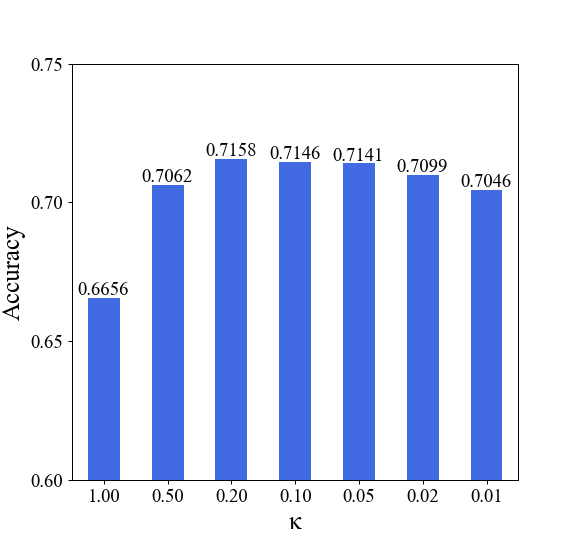

In [78]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 15})
#plt.figure()
df_mdec_kappa_acc.plot.bar(rot=0, legend=False, color='#4169E1', figsize=(6.4,6))
count = -0.41
for index, value in df_mdec_kappa_acc.iterrows(): 
    plt.text(count, value[0]+0.001, '%.4f'%value[0])
    count = count + 1
plt.yticks(np.arange(0.60, 0.75, 0.05))
plt.ylim(0.60, 0.75)
# plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
# plt.text(0, 0.55, '100,000', color='#fe8c00')
# plt.text(105000, 0.55, 'Pretrain limit', color='#fe8c00')
# plt.axhline(y=0.6415, color='g', linestyle='--', linewidth=1)
# plt.text(750000, 0.6430, '0.6415', color='g')
# plt.text(750000, 0.6360, 'Baseline (Text LSTM)', color='g')
# plt.legend()
plt.xlabel('κ', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
# plt.title('Semi-supervised multi-DEC accuracy', fontsize=18)
plt.savefig("1000000_kappa_acc.pdf")

In [7]:
# load raw data
mdec_result_acc = 'mdec_result_acc.csv'
df_mdec_acc = pd.read_csv(os.path.join('./result', mdec_result_acc), index_col=0, header=0, encoding='utf-8-sig')

In [8]:
print(df_mdec_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6517
20000                          0.6721
50000                          0.6915
100000                         0.7019
200000                         0.7019
500000                         0.7112
1000000                        0.7158


In [14]:
es_dict = {"accuracy": [0.6262, 0.6936, 0.6971, 0.7022, 0.7049, 0.7049, 0.7128, 0.7173]}
df_es_acc = pd.DataFrame(data=es_dict, index=[0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
df_es_acc.index.name = "number of unlabeled samples"
print(df_es_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6936
20000                          0.6971
50000                          0.7022
100000                         0.7049
200000                         0.7049
500000                         0.7128
1000000                        0.7173


In [29]:
k_1_dict = {"accuracy": [0.6262, 0.6409, 0.6478, 0.6560, 0.6619, 0.6532, 0.6540, 0.6656]}
df_k_1_acc = pd.DataFrame(data=k_1_dict, index=[0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
df_k_1_acc.index.name = "number of unlabeled samples"
print(df_k_1_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6409
20000                          0.6478
50000                          0.6560
100000                         0.6619
200000                         0.6532
500000                         0.6540
1000000                        0.6656


In [52]:
k_05_dict = {"accuracy": [0.6262, 0.6461, 0.6559, 0.6779, 0.6874, 0.6928, 0.6949, 0.7062]}
df_k_05_acc = pd.DataFrame(data=k_05_dict, index=[0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
df_k_05_acc.index.name = "number of unlabeled samples"
print(df_k_05_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6461
20000                          0.6559
50000                          0.6779
100000                         0.6874
200000                         0.6928
500000                         0.6949
1000000                        0.7062


In [54]:
k_02_dict = {"accuracy": [0.6262, 0.6485, 0.6712, 0.6910, 0.6987, 0.7009, 0.7101, 0.7158]}
df_k_02_acc = pd.DataFrame(data=k_02_dict, index=[0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
df_k_02_acc.index.name = "number of unlabeled samples"
print(df_k_02_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6485
20000                          0.6712
50000                          0.6910
100000                         0.6987
200000                         0.7009
500000                         0.7101
1000000                        0.7158


In [55]:
k_01_dict = {"accuracy": [0.6262, 0.6517, 0.6721, 0.6915, 0.7019, 0.7019, 0.7112, 0.7146]}
df_k_01_acc = pd.DataFrame(data=k_01_dict, index=[0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
df_k_01_acc.index.name = "number of unlabeled samples"
print(df_k_01_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6517
20000                          0.6721
50000                          0.6915
100000                         0.7019
200000                         0.7019
500000                         0.7112
1000000                        0.7146


In [56]:
k_005_dict = {"accuracy": [0.6262, 0.6509, 0.6670, 0.6894, 0.7011, 0.7040, 0.7102, 0.7141]}
df_k_005_acc = pd.DataFrame(data=k_005_dict, index=[0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
df_k_005_acc.index.name = "number of unlabeled samples"
print(df_k_005_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6509
20000                          0.6670
50000                          0.6894
100000                         0.7011
200000                         0.7040
500000                         0.7102
1000000                        0.7141


In [57]:
k_002_dict = {"accuracy": [0.6262, 0.6516, 0.6678, 0.6862, 0.6945, 0.6953, 0.7045, 0.7099]}
df_k_002_acc = pd.DataFrame(data=k_002_dict, index=[0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
df_k_002_acc.index.name = "number of unlabeled samples"
print(df_k_002_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6516
20000                          0.6678
50000                          0.6862
100000                         0.6945
200000                         0.6953
500000                         0.7045
1000000                        0.7099


In [31]:
k_001_dict = {"accuracy": [0.6262, 0.6559, 0.6688, 0.6840, 0.6918, 0.6897, 0.6970, 0.7046]}
df_k_001_acc = pd.DataFrame(data=k_001_dict, index=[0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000])
df_k_001_acc.index.name = "number of unlabeled samples"
print(df_k_001_acc)

                             accuracy
number of unlabeled samples          
0                              0.6262
10000                          0.6559
20000                          0.6688
50000                          0.6840
100000                         0.6918
200000                         0.6897
500000                         0.6970
1000000                        0.7046


<IPython.core.display.Javascript object>


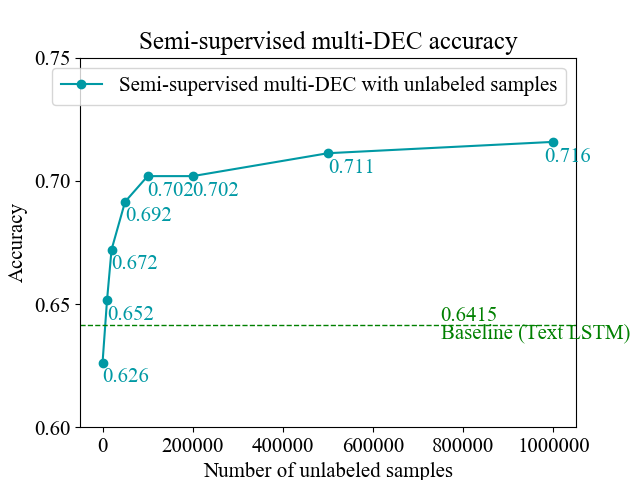

Text(0.5, 1.0, 'Semi-supervised multi-DEC accuracy')

In [15]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure()
plt.plot(df_mdec_acc, marker='o', linestyle='-', color='#0099a4', label='Semi-supervised multi-DEC with unlabeled samples')
for index, value in df_mdec_acc.iterrows(): 
    if index == 1000000:
        plt.text(index-20000, value[0]-0.008, '%.3f'%value[0], color='#0099a4')
    else:
        plt.text(index, value[0]-0.008, '%.3f'%value[0], color='#0099a4')
plt.yticks(np.arange(0.60, 0.75, 0.05))
# plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
# plt.text(0, 0.55, '100,000', color='#fe8c00')
# plt.text(105000, 0.55, 'Pretrain limit', color='#fe8c00')
plt.axhline(y=0.6415, color='g', linestyle='--', linewidth=1)
plt.text(750000, 0.6430, '0.6415', color='g')
plt.text(750000, 0.6360, 'Baseline (Text LSTM)', color='g')
plt.legend()
plt.xlabel('Number of unlabeled samples')
plt.ylabel('Accuracy')
plt.title('Semi-supervised multi-DEC accuracy')

<IPython.core.display.Javascript object>


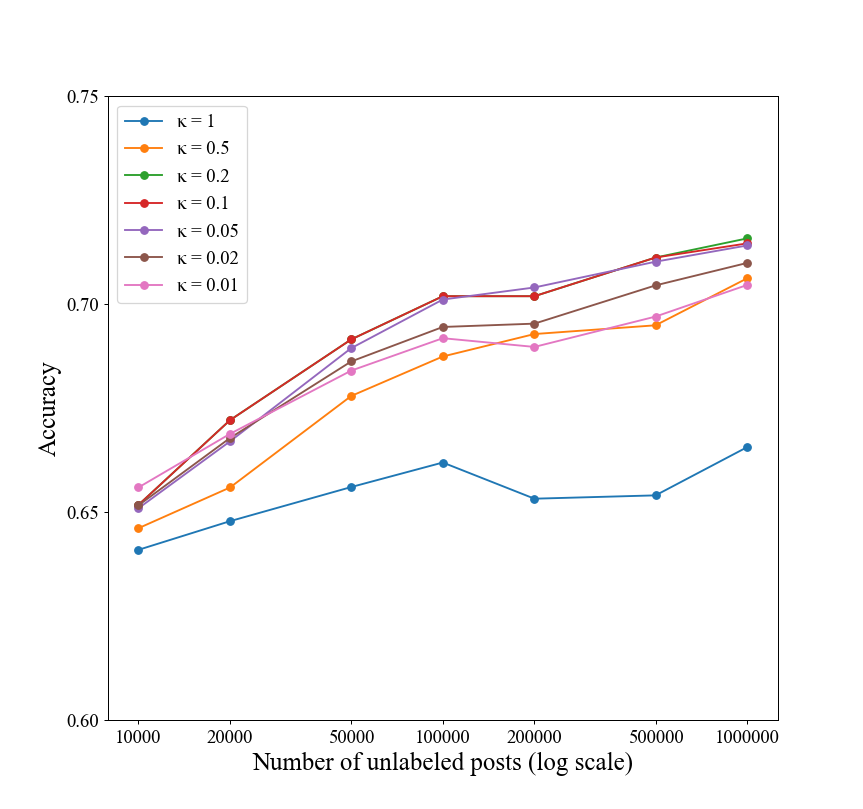

In [63]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots(figsize=(9.6,9))
#f = ax1.figure(figsize=(6.4, 6))
ax1.plot(df_k_1_acc.iloc[1:], marker='o', linestyle='-', label='κ = 1')
ax1.plot(df_k_05_acc.iloc[1:], marker='o', linestyle='-', label='κ = 0.5')
ax1.plot(df_mdec_acc.iloc[1:], marker='o', linestyle='-', label='κ = 0.2')
ax1.plot(df_k_01_acc.iloc[1:], marker='o', linestyle='-', label='κ = 0.1')
ax1.plot(df_k_005_acc.iloc[1:], marker='o', linestyle='-', label='κ = 0.05')
ax1.plot(df_k_002_acc.iloc[1:], marker='o', linestyle='-', label='κ = 0.02')
ax1.plot(df_k_001_acc.iloc[1:], marker='o', linestyle='-', label='κ = 0.01')
#ax1.plot(df_es_acc.iloc[1:], marker='o', linestyle='-', label='Semi-supervised multi-DEC (early stop)')
# for index, value in df_mdec_acc.iloc[1:].iterrows(): 
#     if index == 1000000:
#         ax1.text(index-300000, value[0]-0.008, '%.4f'%value[0])
#     elif index == 500000:
#         ax1.text(index-150000, value[0]-0.008, '%.4f'%value[0])
#     else:
#         ax1.text(index, value[0]-0.008, '%.4f'%value[0])
ax1.set_yticks(np.arange(0.60, 0.75, 0.05))
ax1.set_xscale('log')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_xticks([10000, 20000, 50000, 100000, 200000, 500000, 1000000])
ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 
# plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
# plt.text(0, 0.55, '100,000', color='#fe8c00')
# plt.text(105000, 0.55, 'Pretrain limit', color='#fe8c00')
plt.legend()
plt.xlabel('Number of unlabeled posts (log scale)', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.title('Semi-supervised multi-DEC accuracy', fontsize=18)
fig1.savefig("multi_dec_acc_log.pdf")

In [17]:
# load raw data
mdec_result_nmi = 'mdec_result_nmi.csv'
df_mdec_nmi = pd.read_csv(os.path.join('./result', mdec_result_nmi), index_col=0, header=0, encoding='utf-8-sig')

<IPython.core.display.Javascript object>


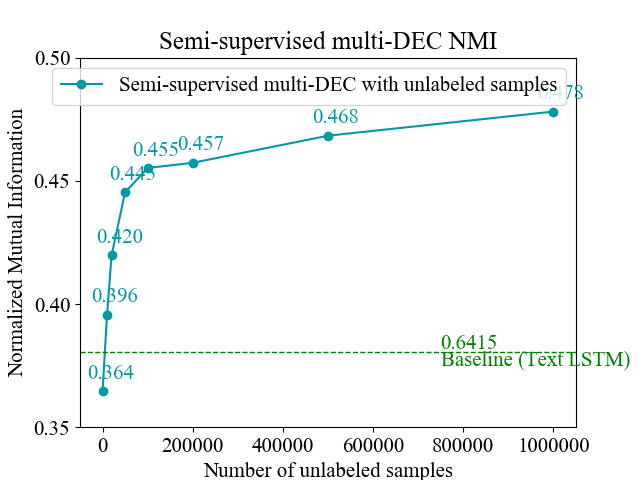

Text(0.5, 1.0, 'Semi-supervised multi-DEC NMI')

In [18]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure()
plt.plot(df_mdec_nmi, marker='o', linestyle='-', color='#0099a4', label='Semi-supervised multi-DEC with unlabeled samples')
for index, value in df_mdec_nmi.iterrows(): 
    plt.text(index-35000, value[0]+0.005, '%.3f'%value[0], color='#0099a4')
plt.yticks(np.arange(0.35, 0.50, 0.05))
# plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
# plt.text(0, 0.55, '100,000', color='#fe8c00')
# plt.text(105000, 0.55, 'Pretrain limit', color='#fe8c00')
plt.axhline(y=0.3804, color='g', linestyle='--', linewidth=1)
plt.text(750000, 0.3819, '0.6415', color='g')
plt.text(750000, 0.3749, 'Baseline (Text LSTM)', color='g')
plt.legend()
plt.xlabel('Number of unlabeled samples')
plt.ylabel('Normalized Mutual Information')
plt.title('Semi-supervised multi-DEC NMI')

In [19]:
# load raw data
mdec_result_f1 = 'mdec_result_f1.csv'
df_mdec_f1 = pd.read_csv(os.path.join('./result', mdec_result_f1), index_col=0, header=0, encoding='utf-8-sig')

<IPython.core.display.Javascript object>


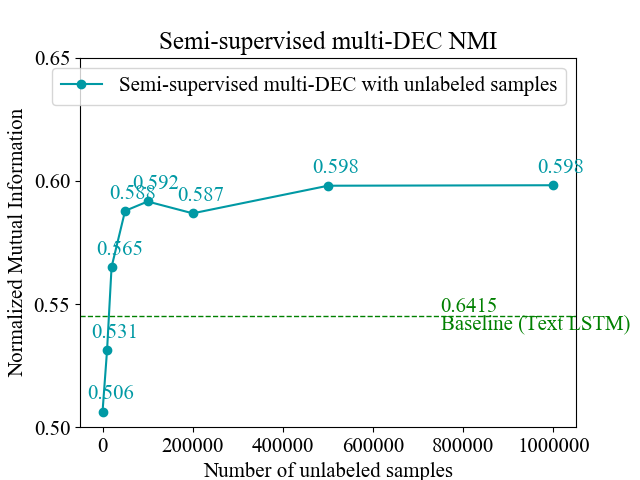

Text(0.5, 1.0, 'Semi-supervised multi-DEC NMI')

In [20]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure()
plt.plot(df_mdec_f1, marker='o', linestyle='-', color='#0099a4', label='Semi-supervised multi-DEC with unlabeled samples')
for index, value in df_mdec_f1.iterrows(): 
    plt.text(index-35000, value[0]+0.005, '%.3f'%value[0], color='#0099a4')
plt.yticks(np.arange(0.50, 0.65, 0.05))
# plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
# plt.text(0, 0.55, '100,000', color='#fe8c00')
# plt.text(105000, 0.55, 'Pretrain limit', color='#fe8c00')
plt.axhline(y=0.5453, color='g', linestyle='--', linewidth=1)
plt.text(750000, 0.5468, '0.6415', color='g')
plt.text(750000, 0.5398, 'Baseline (Text LSTM)', color='g')
plt.legend()
plt.xlabel('Number of unlabeled samples')
plt.ylabel('Normalized Mutual Information')
plt.title('Semi-supervised multi-DEC NMI')

In [ ]:
# load raw data
idec_result_acc = 'idec_result_acc.csv'
df_idec_acc = pd.read_csv(os.path.join('./result', idec_result_acc), index_col=0, header=0, encoding='utf-8-sig')
tdec_result_acc = 'tdec_result_acc.csv'
df_tdec_acc = pd.read_csv(os.path.join('./result', tdec_result_acc), index_col=0, header=0, encoding='utf-8-sig')

In [ ]:
print(df_idec_acc)
print(df_tdec_acc)

In [ ]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure()
plt.plot(df_idec_acc, marker='o', linestyle='-', color='#ff7b72', label='Semi-supervised image-DEC with unlabeled samples')
for index, value in df_idec_acc.iterrows(): 
    plt.text(index, value[0]-0.008, '%.3f'%value[0], color='#ff7b72')
plt.plot(df_tdec_acc, marker='o', linestyle='-', color='#5c83ff', label='Semi-supervised text-DEC with unlabeled samples')
for index, value in df_tdec_acc.iterrows(): 
    plt.text(index, value[0]-0.008, '%.3f'%value[0], color='#5c83ff')
plt.yticks(np.arange(0.50, 0.65, 0.05))
plt.axvline(x=100000, color='#fe8c00', linestyle=':', linewidth=1)
plt.text(0, 0.75, '100,000', color='#fe8c00')
plt.text(105000, 0.75, 'Pretrain limit', color='#fe8c00')
plt.legend()
plt.xlabel('Number of unlabeled samples')
plt.ylabel('Accuracy')
plt.title('Semi-supervised uni-DEC accuracy')